# **1.**

다음의 $S$를 계산하는 파이썬 프로그램을 작성하고 실행하여 결과로 $S$값을 출력하라.

$S = \displaystyle\sum_{k=10}^{999} \frac{1}{k}$

In [ ]:
S = 0

for i in range(10,1000):
  S += (1/i)

print(S)



---



# **2.**

지상에서 높이 $h$인 상공에 정지해 있는 헬리콥터에서 수평으로 $v_0$의 속력으로 폭탄을 발사하였다. 폭탄의 속도 $\overrightarrow{v}(t)$는
$\frac{d\overrightarrow{v}}{dt} = -\gamma\overrightarrow{v}-g\boldsymbol{\hat{j}}$

  을 만족한다. $\gamma = 0.1/m$, $g = 9.8 m/s^2$을 사용하라.

**(a)** $h = 100m$, $v_0 = 100m/s$일 때, 폭탄이 지상에 떨어질 때까지의 궤적을 그래프를 출력하라. 또, 지상에 떨어지는 시간 $t_f$와 이때까지 폭탄이 이동한 수평거리 $R$을 출력하라.

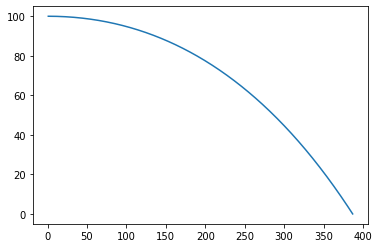

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.1 ; g = 9.8 ; h = 100 ; v0 = 100
dt = 0.01 ; t = 0

vx = v0 ; vy = 0
x = 0 ; y = h
px = [] ; py = []
while y > -1e-10:
  x += vx*dt
  y += vy*dt
  vx -= gamma*vx*dt
  vy -= (gamma*vy+g)*dt
  px.append(x)
  py.append(y)
  t += dt
plt.plot(px,py)
plt.show()

print(t,px[-1])

**(b)** $h = 100m$로 고정된 경우, 수평거리가 $R = 1 km$에 있는 목표물을 맞추기 위한 초기 속력 $v_0$은 얼마인지 수치적 실험이나 해석적 추측으로 찾아내어 $v_0$값을 출력하고 $R = 1 km$임을 확인하라.

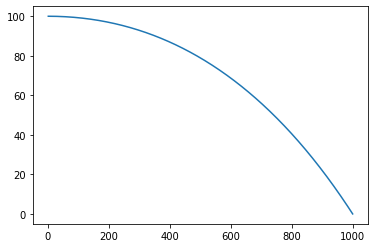

258.4600000000811 1000.0093737727647


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.1 ; g = 9.8 ; h = 100
dt = 0.01 ; t = 0

for i in np.arange(100, 300, 0.01):
  v0 = i
  vx = v0 ; vy = 0 ; t = 0
  x = 0 ; y = h
  px = [] ; py = []
  while y > -1e-10:
    x += vx*dt
    y += vy*dt
    vx -= gamma*vx*dt
    vy -= (gamma*vy+g)*dt
    px.append(x)
    py.append(y)
    t += dt
  if px[-1] - 1000 > -1e-10:
    plt.plot(px,py)
    plt.show()
    print(v0,px[-1])
    break

**(c)** $v_0 = 100m/s$로 고정된 경우, 수평거리가 $R = 1km$에 있는 목표물을 맞추기 위한 초기 높이 $h$은 얼마인지 수치적 실험이나 해석적 추측으로 찾아내어 $h$값을 출력하고 $R = 1 km$임을 확인하라.

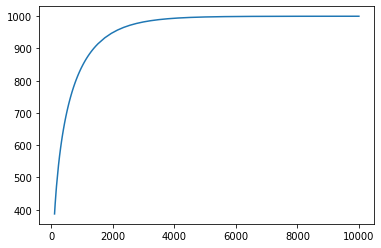

h = ∞


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.1 ; g = 9.8 ; v0 = 100
dt = 0.01 ; t = 0

h = []; R = []
for i in np.arange(100, 10000, 1):
  vx = v0 ; vy = 0 ; t = 0
  x = 0 ; y = i
  h.append(i)
  px = [] ; py = []
  while y > -1e-10:
    x += vx*dt
    y += vy*dt
    vx -= gamma*vx*dt
    vy -= (gamma*vy+g)*dt
    px.append(x)
    py.append(y)
    t += dt
  R.append(px[-1])

plt.plot(h,R)
plt.show()

print('h = ∞')

**(d)** $\gamma$값이 변해도 항상 같은 위치에 폭탄이 떨어지게 하려면, 초기 높이 $h$와 초기 속력 $v_0$를 $\gamma$값에 따라 어떻게 변화시켜야 하는지 추측하고 수치적으로 검증하라.



---



# **3.**

몬테칼로 방법으로 적분값
$I = \int_{0}^{1}\frac{x^{-5/7}}{e^x+1} dx$
를 구하려고 한다. (표본 추출 횟수는 $N = 4000$ 사용)

**(a)** 피적분 함수 $f(x) = \frac{x^{-5/7}}{e^x+1}$의 균일 표본 추출 방법으로 위의 적분값을 구하는 프로그램을 작성하고 적분값을 출력하라.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rep(N):
  x = np.random.uniform(0,1,N) # 0 ~ 1 난수
  f = (x**(-5/7))/(np.exp(x)+1)

  return (np.mean(f)*(1-0))

N = 4000            # 점 개수 N
print(rep(N))

1.5328153839167484


**(b)** $[0,1]$에서 균일한 분포로 추출되는 랜덤 넘버 $z$로부터 $p(x) = \frac{2}{7}x^{-5/7}$의 분포로 $0 \le x \le 1$를 추출하는 방법을 텍스트로 적어라.

> 균일한 난수 $z$로부터 x의 범위를 0 ~ 1로 추출하려면, 계산을 해야한다.

> $\Rightarrow$ 균일한 난수 $z$로부터, 확률밀도 $p(x)$를 가지는 난수 $x$를 만들어 내려면, $x = z^{\frac{7}{2}}$로 두고 풀면 된다.

**(c)** (b)의 방법으로 추출한 $x$를 이용한 중요 표본 추출 방법으로 식 (3)의 적분값을 계산하는 프로그램을 작성하고 적분값을 출력하라.

In [ ]:
import numpy as np

def rep(N):
  z = np.random.uniform(0,1,N)     ### 0 ~ root(2) 난수
  x = z**(7/2)          ### 확률 밀도를 가지는 난수 x를 만들어냄
  g = 1/(np.exp(x)+1)
  g_mean_w = np.mean(g)
  return((7/2)*g_mean_w)

N = 4000

print(rep(N))

1.5570818833066746


**(d)** (a)를 $M = 25$ 반복하여 평균과 표준편차를 구하고 보고할 적분값을 출력하라.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rep(N):
  x = np.random.uniform(0,1,N) # 0 ~ 1 난수
  f = (x**(-5/7))/(np.exp(x)+1)

  return (np.mean(f)*(1-0))

N = 4000            # 점 개수 N
s=[]
for i in range(25): # 실험 횟수 M = 25
  s.append(rep(N))

print('평균 : %f, 표준편차 : %f' %(np.mean(s),np.std(s)))
print("수치실험 결과 : I = %f ± %f" %(np.mean(s),(np.std(s)/(25**(1/2)))))

평균 : 1.529383, 표준편차 : 0.140410
수치실험 결과 : I = 1.529383 ± 0.028082


**(e)** (c)를 $M=25$ 반복하여 평균과 표준편차를 구하고 보고할 적분 값을 출력하라.

In [ ]:
import numpy as np

def rep(N):
  z = np.random.uniform(0,1,N)     ### 0 ~ root(2) 난수
  x = z**(7/2)          ### 확률 밀도를 가지는 난수 x를 만들어냄
  g = 1/(np.exp(x)+1)
  g_mean_w = np.mean(g)
  return((7/2)*g_mean_w)

N = 4000
s=[]
for i in range(25): # 실험 횟수 R = 25
  s.append(rep(N))

print('평균 : %f, 표준편차 : %f' %(np.mean(s),np.std(s)))
print("수치실험 결과 : I = %f ± %f" %(np.mean(s),(np.std(s)/(25**(1/2)))))

평균 : 1.561166, 표준편차 : 0.003604
수치실험 결과 : I = 1.561166 ± 0.000721




---



# **4.**

해밀토니안이

$H = -J\displaystyle\sum_{i=0}^{N-1} S_iS_{i+1} - B\displaystyle\sum_{i=0}^{N-1} S_i$

로 주어지는 1차원 Ising 모형의 평균 자화율을 몬테칼로 시뮬레이션으로 구하려고 한다.

온도 $T$인 평형 상태에 있을 때, 계가 $X = \{S_0, S_1, ..., S_{N-1}\}$ 상태에 있을 확률은

$p(X;T) = \frac{1}{Z(T)} e^{-H(X)/T}$

로 주어진다. 여기서 $Z(T) = \displaystyle\sum_{X}^{} e^{-H(X)/T}$는 분배함수이다. 주기 경계 조건( $S_N = S_0$ )을 사용하고 $N = 10$ , $J = 1$ , $B = 0.5$인 경우를 고려하라.

**(a)** 랜덤한 초기 상태를 만들고, 초기 스핀 상태를 출력하라.

In [ ]:
import numpy as np

N = 10
s = (np.random.randint(2,size=N))*2-1  ### 초기 스핀

print(s)

[ 1  1  1  1  1 -1 -1  1  1  1]


**(b)** 온도 $T = 1$일 때, 초기의 랜덤한 한 상태에서 평형 상태로 변화해가는 과정을 메트로폴리스 알고리즘으로 프로그램하고 초기($t = 0$)상태에서 $t = t_{max} = 100$까지 자화율

$m(t) = \frac{1}{N} \displaystyle\sum_{i=0}^{N-1} S_i(t)$

을 시간 $t$의 그래프로 나타내어라.

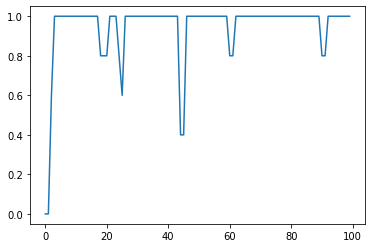

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 변화하는 확률 구하기
def proba():
  p={}
  for si in [-1,1]:
    for sj in [-1,1]:
      for sk in [-1,1]:
        p[(si,sj,sk)] = np.exp((-2*J*(si+sk)*sj - 2*B*sj)/temp)
  return(p)

# 한 타임당 스핀이 변하게 하는 함수 !!
def change_spin(N):
  for n in range(N):
    i = np.random.randint(0,N-1)   ### i번째의 스핀
    iplus1 = i+1
    if i == N-1:
      iplus1 = 0
    if np.random.rand() < pflip[(s[i-1],s[i],s[iplus1])]:
      s[i] *= (-1)
  return(s)

# 초기 조건 & 시간별로 바뀌는 것 계산하기
J=1; B=0.5; N=10; Tmax=100; temp=1
s = (np.random.randint(2,size=N))*2-1  ### 초기 스핀
mag = [np.mean(s)]
pflip = proba()
for t in range(1,Tmax):
  mag.append(np.mean(change_spin(N)))

# 그래프 그리기
xt = np.linspace(0,Tmax-1,Tmax)
plt.plot(xt,mag)
plt.show()

**(c)** (b)의 과정을 $RPS = 100$번 반복하면서, 자화률

$\left\langle m(t) \right\rangle = \frac{1}{N} \left\langle \displaystyle\sum_{i} S_i(t) \right\rangle$

의 평균값을 시간에 따른 그래프로 나타내고 평형 상태에서의 자화율 $m_{eq}$을 출력하라.

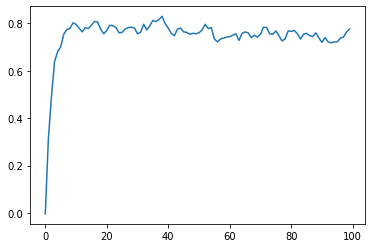

평형 상태에서의 자화율 = 0.7445999999999999


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 변화하는 확률 구하기
def proba():
  p={}
  for si in [-1,1]:
    for sj in [-1,1]:
      for sk in [-1,1]:
        p[(si,sj,sk)] = np.exp((-2*J*(si+sk)*sj - 2*B*sj)/temp)
  return(p)

# 한 타임당 스핀이 변하게 하는 함수 !!
def change_spin(N):
  for n in range(N):
    i = np.random.randint(0,N-1)   ### i번째의 스핀
    iplus1 = i+1
    if i == N-1:
      iplus1 = 0
    if np.random.rand() < pflip[(s[i-1],s[i],s[iplus1])]:
      s[i] *= (-1)
  return(s)

# 반복~
RPS = 100
mag = [[] for i in range(RPS)]
for r in range(RPS):
  J=1; B=0.5; N=10; Tmax=100; temp=1
  s = (np.random.randint(2,size=N))*2-1  ### 초기 스핀
  mag[r].append(np.mean(s))
  pflip = proba()
  for t in range(1,Tmax):
    mag[r].append(np.mean(change_spin(N)))

# 평균 내기
mag_eq = []
for t in range(Tmax):
  sum = 0
  for r in range(RPS):
    sum += mag[r][t]
  mag_eq.append(sum/RPS)

# 그래프 그리기
xt = np.linspace(0,Tmax-1,Tmax)
plt.plot(xt,mag_eq)
plt.show()

# 평형 상태 자화율
N = 0; sum = 0
for i in range(80,100):
  N += 1; sum += mag_eq[i]
print('평형 상태에서의 자화율 =',sum/N)

**(d)** 온도 $T = 0.2, 0.5, 1.0, 1.5, 2.0, 3.0, 6.0$에 대하여 평형 상태의 평균 자화율을 구하고, 평형 상태 자화율을 온도에 따른 그래프를 그려라.

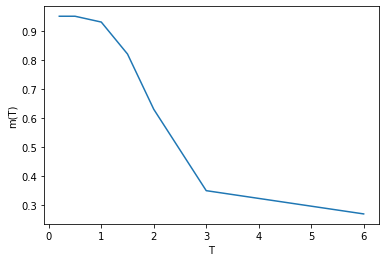

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 변화하는 확률 구하기
def proba(temp):
  p={}
  for si in [-1,1]:
    for sj in [-1,1]:
      for sk in [-1,1]:
        p[(si,sj,sk)] = np.exp((-2*J*(si+sk)*sj - 2*B*sj)/temp)
  return(p)

# 한 타임당 스핀이 변하게 하는 함수 !!
def change_spin(N):
  for n in range(N):
    i = np.random.randint(0,N-1)   ### i번째의 스핀
    iplus1 = i+1
    if i == N-1:
      iplus1 = 0
    if np.random.rand() < pflip[(s[i-1],s[i],s[iplus1])]:
      s[i] *= (-1)
  return(s)

# 초기 조건, 자화율 그리기
Tmax = 50   ### 온도별 지속 시간
Templist = [0.2, 0.5, 1.0, 1.5, 2.0, 3.0, 6.0]
J=1; B=0.5; N=10; temp=1; tempIndex=0
s = np.ones(N)   ### 온도 0에서 시작하는 초기 스핀 N개
mag = [np.mean(s)]
for t in range(1,Tmax*len(Templist)):
  if t%Tmax == 0:
    tempIndex += 1
  T = Templist[tempIndex]
  pflip = proba(T)   ### 온도에 따른 확률
  change_spin(N)   ### 확률에 따라 스핀(N번) 바꾸기 => 한 타임
  mag.append(np.mean(change_spin(N)))   ### 자화율 저장

# 평형 상태의 자화율의 평균
t_eq = 30   ### 평형상태가 되는 시간
t_mea = 20   ### 평형상태가 유지되는 시간
mag_eq = []
for i in range(len(Templist)):
  sum = 0
  for t in range(((Tmax*i)+t_eq+1), ((Tmax*i)+t_eq+t_mea)):
    sum += mag[t]
  mag_eq.append(sum/(t_mea))

# 그래프 그리기
plt.plot(Templist,mag_eq)
plt.xlabel('T')
plt.ylabel('m(T)')
plt.show()

**(e)** 메트로폴리스 중요도 선택이 아니라 균일(uniform) 표본 방식으로 평형 상태의 평균 자화율을 구하려고 한다. (a)의 랜덤 스핀 상태에서 균일(uniform) 표본 방식으로 표본을 만들면서

$m_{eq}(T) = \displaystyle\sum_{X}p(X;T)m(X)$

를 계산하여 $T = 0.2, 0.5, 1.0, 1.5, 2.0, 3.0, 6.0$에서 평형상태 자화율을 구하고 평형 상태 자화율을 온도에 따른 그래프를 그려라.

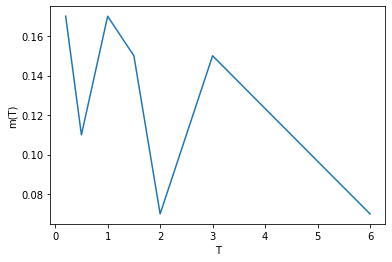

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 해밀토니안
def exp_Hamiltonian(s,temp):
  J = 1; B = 0.5
  sm = np.roll(s,1)
  H = ((-1) * J * np.sum(s*sm)) - (B * np.sum(s))
  return(np.exp((-1)*H/temp))

Templist = [0.2, 0.5, 1.0, 1.5, 2.0, 3.0, 6.0]
N=10; m_eq = []
s = np.ones(N)
for i in range(len(Templist)):
  sAll = [s]
  temp = Templist[i]
  for n in range(N):
    index = np.random.randint(0,N-1)
    s[index] *= (-1)
    sAll.append(s)
  # 분모, 분자
  Z = 0; pm = 0
  for j in range(len(sAll)):
    Z += (exp_Hamiltonian(sAll[j],temp))
    pm += ((exp_Hamiltonian(sAll[j],temp)) * np.mean(sAll[j]))
  m_eq.append(pm/Z)

# 그래프 그리기
plt.plot(Templist,mag_eq)
plt.xlabel('T')
plt.ylabel('m(T)')
plt.show()

**(f)** 평형 상태 자화율을 수치적으로 exact하게 구하려고 한다. $N = 10$일 때, 가능한 모든 상태 $X$에 대하여 Eq.(8)를 계산하여 $T = 0.2, 0.5, 1.0, 1.5, 2.0, 3.0, 6.0$에서 평형상태 자화율을 구하고 평형 상태 자화율을 온도에 따른 그래프를 그려라.

[0.9999999999718461, 0.9998785702024152, 0.9678308015496282, 0.7896251270093472, 0.565957600066725, 0.31005096325543285, 0.11565434735335042]


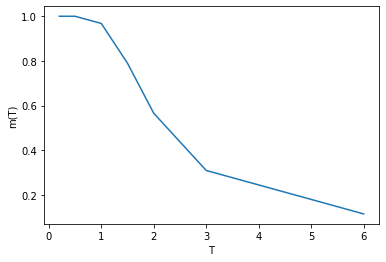

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 스핀 전체 종류(sAll)
sAll = []
for a in (-1,1):
  for b in (-1,1):
    for c in (-1,1):
      for d in (-1,1):
        for e in (-1,1):
          for f in (-1,1):
            for g in (-1,1):
              for h in (-1,1):
                for i in (-1,1):
                  for j in (-1,1):
                    sAll.append([a,b,c,d,e,f,g,h,i,j])

# 해밀토니안
def exp_Hamiltonian(s,temp):
  J = 1; B = 0.5
  sm = np.roll(s,1)
  H = ((-1) * J * np.sum(s*sm)) - (B * np.sum(s))
  return(np.exp((-1)*H/temp))

# m_eq 구하기
Templist = [0.2, 0.5, 1.0, 1.5, 2.0, 3.0, 6.0]
m_eq = []
for i in range(len(Templist)):
  temp = Templist[i]
  # 분모, 분자
  Z = 0; pm = 0
  for j in range(len(sAll)):
    Z += (exp_Hamiltonian(sAll[j],temp))
    pm += ((exp_Hamiltonian(sAll[j],temp)) * np.mean(sAll[j]))
  m_eq.append(pm/Z)

# 그래프 그리기
print(m_eq)
plt.plot(Templist,m_eq)
plt.xlabel('T')
plt.ylabel('m(T)')
plt.show()

# **5.**

2명이 한 팀이 되어 경기하는 게임에 6명이 참가 신청을 하였다. 이들의 개인 게임 능력치는 다음 표와 같다.
- 선수 : P0 → 능력치 : 59
- 선수 : P1 → 능력치 : 38
- 선수 : P2 → 능력치 : 83
- 선수 : P3 → 능력치 : 46
- 선수 : P4 → 능력치 : 18
- 선수 : P5 → 능력치 : 70

각 팀의 능력치는 그 팀을 구성하고 있는 팀원의 능력치의 합으로 주어진다고 하자.

**(a)** 세 팀을 t0 = (P0, P1), t1 = (P2, P3), t3 = (P4, P5)로 구성했을 떄, 각 팀의 능력치를 구하고, 팀들 간의 능력치의 분산을 구하라.

In [ ]:
import numpy as np

player = ['P0','P1','P2','P3','P4','P5']
score = [59,38,83,46,18,70]

t0 = 0; t1 = 0; t2 = 0
for i in range(len(player)):
  if (i==0) or (i==1):
    t0 += score[i]
  elif (i==2) or (i==3):
    t1 += score[i]
  else:
    t2 += score[i]

t = [t0, t1, t2]
print(t)

print(np.var(t))

[97, 129, 88]
309.55555555555554


**(b)** 담근질 시늉으로 팀들 간의 능력치의 분산이 최소가 되게 세 팀을 구성하고 그 때의 팀들 간 능력치 분산을 구하라.

**=== delta_var 쓰니까 값이 잘 안나옴**

In [ ]:
import numpy as np

player = ['P0','P1','P2','P3','P4','P5']
score = [59,38,83,46,18,70]

# 초기 조건
t = [0,1,2,3,4,5]
team = [[] for i in range(3)]
for i in range(3):
  team[i] = np.random.choice(t,2,replace=False)
  for j in range(len(team[i])): t.remove(team[i][j])
Tmin = 1e-100; Tmax = 100; ttt = 0
T = Tmax * np.exp(-ttt/100000)

# 팀 위치 바꾸는 합수 !!
def swap(i,j,m1,m2):
  s = team[i][m1]; team[i][m1] = team[j][m2]; team[j][m2] = s

# 분산 구하는 함수
def var():
  sum = [0,0,0]
  for i in range(len(team)):
    for j in range(len(team[i])):
      sum[i] += (score[team[i][j]])
  return(np.var(sum))

# swap 전과 후의 분산 차이를 구하는 함수
def Delta_V(i,j,m1,m2):
  mean = np.sum(score) / 3
  V_before = ((team[i][m1] + team[i][1-m1] - mean)**2 + (team[j][m2] + team[j][1-m2] - mean)**2) / 3
  V_after = ((team[j][m2] + team[i][1-m1] - mean)**2 + (team[i][m1] + team[j][1-m2] - mean)**2) / 3
  return(V_after - V_before)

# 실행 !!
Vmin = var()
while T > Tmin:
  ## 바꾸기
  i = np.random.randint(0,3) ; j = np.random.randint(0,2)   ### index 주의
  if i == j: j = 2
  m1 = np.random.randint(0,2) ; m2 = np.random.randint(0,2)
  ## 전이 허용
  vv = Delta_V(i,j,m1,m2)
  if (vv < 0) or ((vv >= 0) and (np.random.rand() < np.exp((-1)*vv/T))) :
    swap(i,j,m1,m2); Vmin += vv
  ttt+=1; T = Tmax * np.exp(-ttt/100000)   ### 온도 변화에 민감하게

print(team)
print(Vmin)

[array([1, 4]), array([0, 5]), array([2, 3])]
173.5555555557429


**(c)** 세 팀간의 Round-robin Tournament를 두 번 실시하려고 한다. 두 번째 Tournament의 팀 구성은 첫 번째 Tournament에서 한 팀이었던 경우를 제외하고 구성한다고 하자. 첫 번째 Tournament팀간의 분산과 두 번째 Tournament 팀간의 분산의 합이 최소가 되게 팀을 구성하라.

**======= 모르겠음**

In [ ]:
# 초기 조건
team = [[[] for i in range(3)] for r in range(2)]
for r in range(2):
  t = [0,1,2,3,4,5]
  for i in range(3):
    team[r][i] = np.random.choice(t,2,replace=False)
    for j in range(len(team[r][i])): t.remove(team[r][i][j])
Tmin = 1e-10; Tmax = 100; ttt = 0
T = Tmax * np.exp(-ttt/100000)
print(team)

# 팀 위치 바꾸는 합수 !!
def swap(r,i,j,m1,m2):
  s = team[r][i][m1]; team[r][i][m1] = team[r][j][m2]; team[r][j][m2] = s

# 분산 합 구하는 함수
def var():
  sum = [[0,0,0],[0,0,0]]
  for r in range(len(team)):
    for i in range(len(team[r])):
      for j in range(len(team[r][i])):
        sum[r][i] += (score[team[r][i][j]])
  return(np.var(sum[0]) + np.var(sum[1]))

# swap 전과 후의 분산 차이를 구하는 함수
def Delta_V(r,i,j,m1,m2):
  mean = np.sum(score[r]) / 3
  V_before = ((team[r][i][m1] + team[r][i][1-m1] - mean)**2 + (team[r][j][m2] + team[r][j][1-m2] - mean)**2) / 3
  V_after = ((team[r][j][m2] + team[r][i][1-m1] - mean)**2 + (team[r][i][m1] + team[r][j][1-m2] - mean)**2) / 3
  return(V_after - V_before)

# swap한 팀이 겹치지 않게 하는 함수
def check(r,i1,j1,m11,m12,i2,j2,m21,m22):
  s1 = team[r][i1][m11]; team[r][i1][m11] = team[r][j1][m12]; team[r][j1][m12] = s1
  s2 = team[r][i2][m21]; team[r][i2][m21] = team[r][j2][m22]; team[r][j2][m22] = s2
  for i in range(3):
    if team[0][i] in team[1]:


# 실행 !!
Vmin = var()
while T > Tmin:
  ## 바꾸기
  i1 = np.random.randint(0,3) ; j1 = np.random.randint(0,2)   ### index 주의
  if i1 == j1: j1 = 2
  m11 = np.random.randint(0,2) ; m12 = np.random.randint(0,2)
  i2 = np.random.randint(0,3) ; j2 = np.random.randint(0,2)   ### index 주의
  if i2 == j2: j2 = 2
  m21 = np.random.randint(0,2) ; m22 = np.random.randint(0,2)
  ## 팀이 전혀 겹치지 않게 !

  ## 전이 허용
  vv = Delta_V(i,j,m1,m2)
  if (vv < 0) or ((vv >= 0) and (np.random.rand() < np.exp((-1)*vv/T))) :
    swap(i,j,m1,m2); Vmin += vv
  ttt+=1; T = Tmax * np.exp(-ttt/100000)   ### 온도 변화에 민감하게

print(team)
print(Vmin)

[[array([4, 5]), array([3, 0]), array([1, 2])], [array([5, 2]), array([3, 4]), array([1, 0])]]


**(d)** Tournament 한 번에 대하여 가능한 모든 팀 배정 방법을 모두 출력하고 각각에 대하여 팀들 간 능력치의 분산을 적어라.

In [ ]:
import numpy as np
score = [59,38,83,46,18,70]

# 모든 팀 배정
teamList = []
for i in range(1,6):
  t = [0,1,2,3,4,5]
  a = 0 ; t.remove(a) ; b = i ; t.remove(b)
  c = np.min(t) ; t.remove(c)
  for j in t:
    tt = [t[i] for i in range(len(t))]
    d = j ; tt.remove(d)
    e = np.min(tt) ; tt.remove(e) ; f = tt[0]
    teamList.append([[a,b],[c,d],[e,f]])

# 분산 구하는 함수
def var(team):
  sum = [0,0,0]
  for i in range(len(team)):
    for j in range(len(team[i])):
      sum[i] += (score[team[i][j]])
  return(np.var(sum))

for i in range(len(teamList)):
  print("[[%d, %d], [%d, %d], [%d, %d]] : %f" %(teamList[i][0][0],teamList[i][0][1],teamList[i][1][0],teamList[i][1][1],teamList[i][2][0],teamList[i][2][1],var(teamList[i])))

[[0, 1], [2, 3], [4, 5]] : 309.555556
[[0, 1], [2, 4], [3, 5]] : 66.888889
[[0, 1], [2, 5], [3, 4]] : 1349.555556
[[0, 2], [1, 3], [4, 5]] : 699.555556
[[0, 2], [1, 4], [3, 5]] : 1296.888889
[[0, 2], [1, 5], [3, 4]] : 1019.555556
[[0, 3], [1, 2], [4, 5]] : 181.555556
[[0, 3], [1, 4], [2, 5]] : 1568.222222
[[0, 3], [1, 5], [2, 4]] : 8.222222
[[0, 4], [1, 2], [3, 5]] : 386.888889
[[0, 4], [1, 3], [2, 5]] : 1176.222222
[[0, 4], [1, 5], [2, 3]] : 456.222222
[[0, 5], [1, 2], [3, 4]] : 837.555556
[[0, 5], [1, 3], [2, 4]] : 344.222222
[[0, 5], [1, 4], [2, 3]] : 1184.222222
